# Лабораторная работа №3 «Метод прогонки для линейных дифференциальных уравнений второго порядка с периодическим решением»

## Дашкевич Артём Владимирович

### Скрин постановки задачи:
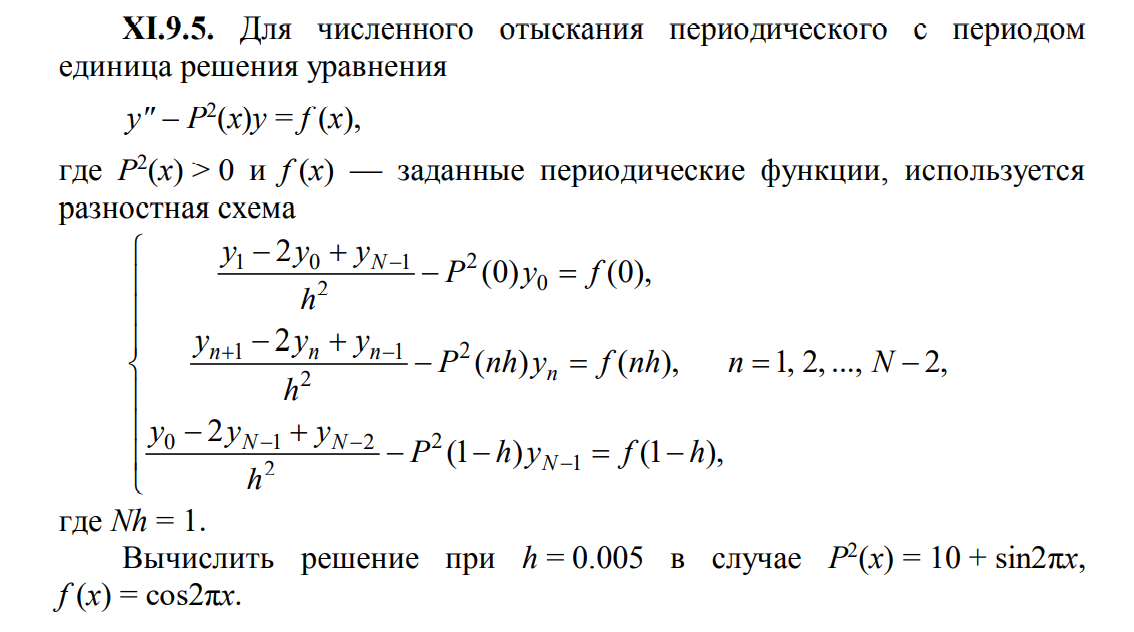

### Описание метода:   
Запишем дискретный аналог уравнения:   
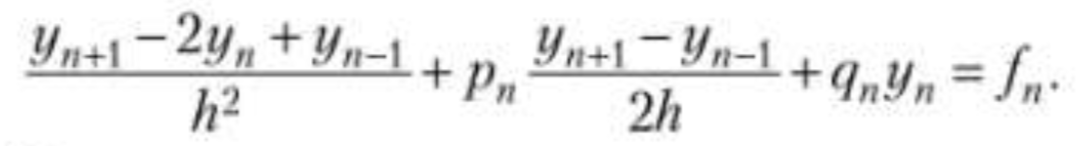   
В таком случае система сеточных соотношений принимает вид:   
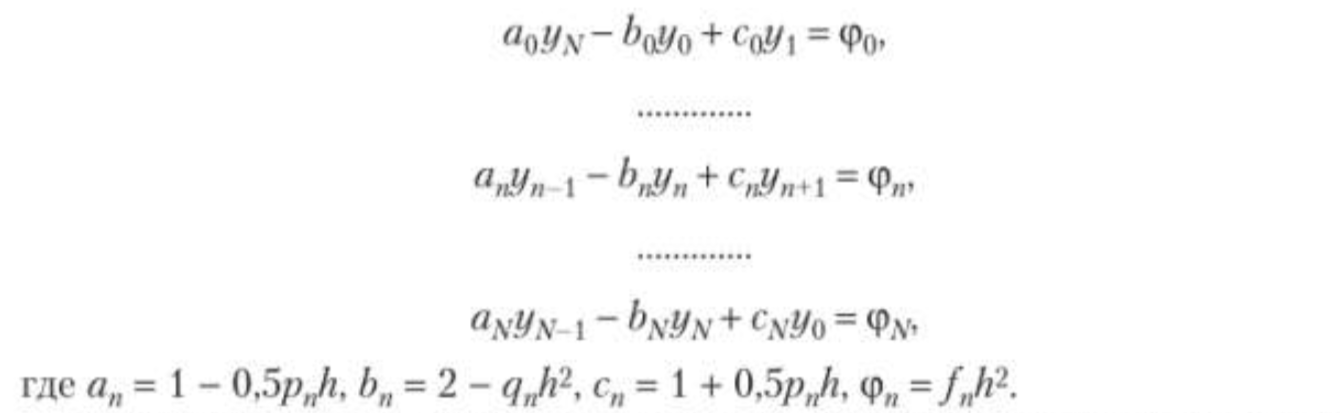   
Для нашего уравнения p_n = 0

Заполним массивы коэффициентов a, b и c:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [26]:
h = 0.005

def q_n(n, h):
    return -10 - np.sin(2 * np.pi * n * h)

def f_n(n, h):
    return np.cos(2 * np.pi * n * h)

size = int(1 / h) + 1
a = [0] * size
b = [0] * size
c = [0] * size

In [27]:
def fill_a(a):
    for i in range(len(a)):
        a[i] = 1

def fill_b(b, q_n, h):
    for i in range(len(b)):
        b[i] = 2 - q_n(i, h) * (h ** 2)

def fill_c(c):
    for i in range(len(c)):
        c[i] = 1

In [28]:
fill_a(a)
fill_b(b, q_n, h)
fill_c(c)

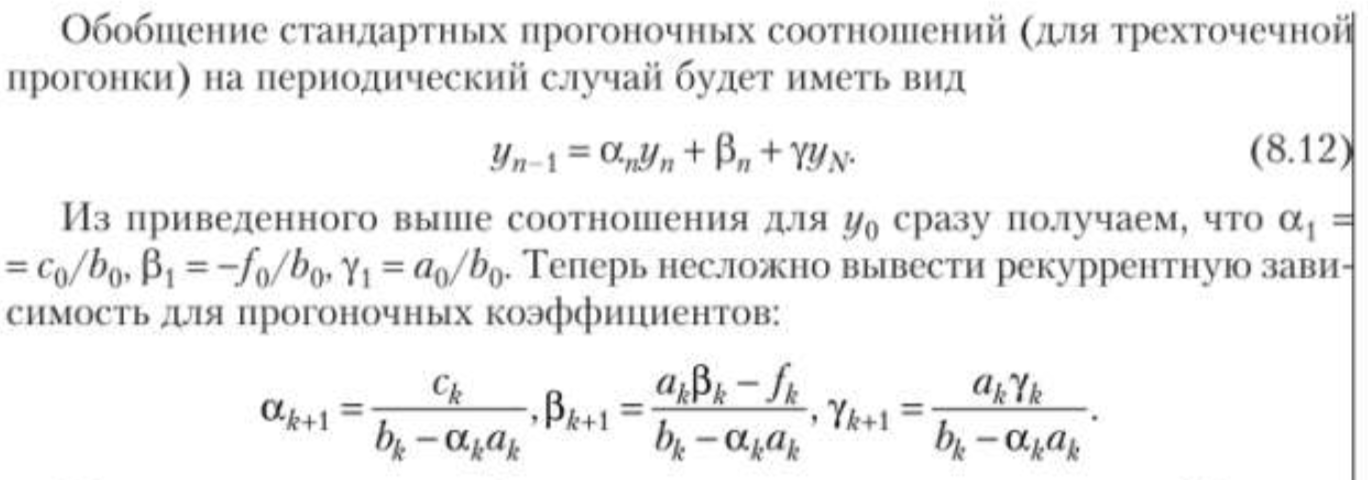

Заполним массивы коэффициентов alpha, beta и gamma:

In [29]:
alpha = [0] * size    # use range [1 - N], 0-index not use
beta = [0] * size    # use range [1 - N], 0-index not use
gamma = [0] * size    # use range [1 - N], 0-index not use

def fill_alpha(alpha, a, b, c):
    alpha[1] = c[0] / b[0]
    for i in range(1, len(alpha) - 1):
        alpha[i + 1] = c[i] / (b[i] - alpha[i] * a[i])

def fill_beta(beta, alpha, a, b, c, f_n, h):
    beta[1] = -f_n(0, h) / b[0]
    for i in range(1, len(beta) - 1):
        beta[i + 1] = (a[i] * beta[i] - f_n(i, h)) / (b[i] - alpha[i] * a[i])

def fill_gamma(gamma, alpha, a, b):
    gamma[1] = a[0] / b[0]
    for i in range(1, len(gamma) - 1):
        gamma[i + 1] = (a[i] * gamma[i]) / (b[i] - alpha[i] * a[i])

In [30]:
fill_alpha(alpha, a, b, c)
fill_beta(beta, alpha, a, b, c, f_n, h)
fill_gamma(gamma, alpha, a, b)

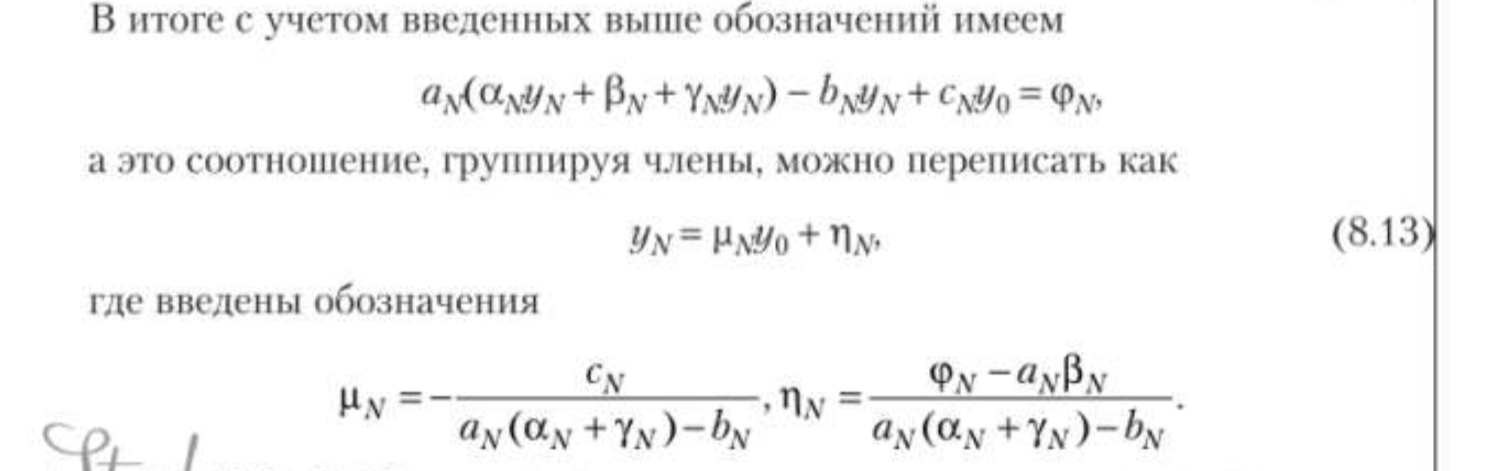

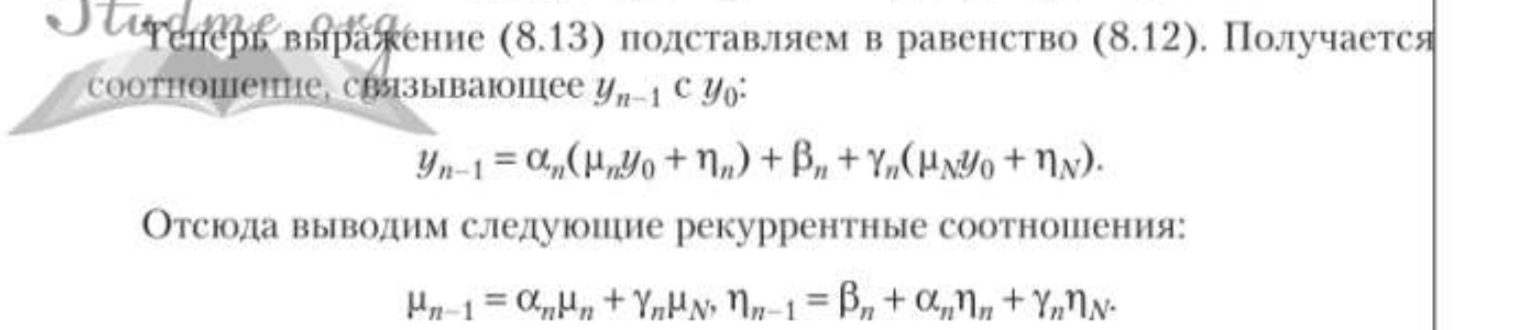

Далее вычислим значения коэффициентов mu_N и eta_N, пройдём в цикле от N до 1 и заполним массивы значений коэффициентов mu и eta на сетке:

In [31]:
mu = [0] * size
eta = [0] * size

def fill_mu(mu, a, b, c, alpha, gamma):
    mu[-1] = - c[-1] / (a[-1] * (alpha[-1] * gamma[-1]) - b[-1])
    for i in range(len(mu) - 1, 0, -1):
        mu[i - 1] = alpha[i] * mu[i] + gamma[i] * mu[-1]

def fill_eta(eta, a, b, alpha, beta, gamma, f_n, h):
    eta[-1] = (f_n(size - 1, h) * h ** 2 - a[-1] * beta[-1]) / (a[-1] * (alpha[-1] * gamma[-1]) - b[-1])
    for i in range(len(eta) - 1, 0, -1):
        eta[i - 1] = alpha[i] * eta[i] + gamma[i] * eta[-1]

In [32]:
fill_mu(mu, a, b, c, alpha, gamma)
fill_eta(eta, a, b, alpha, beta, gamma, f_n, h)

После нахождения значений mu_0 и eta_0 найдём начальную точку решения y_0:   
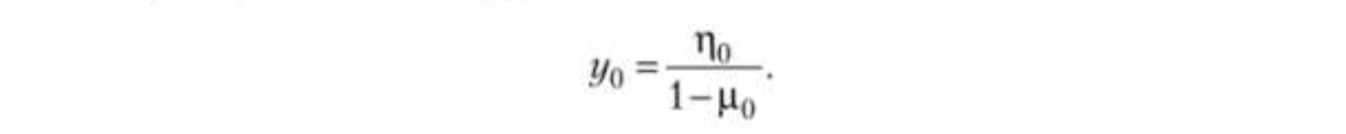

И с помощью неё рассчитаем значения y во всех точках сетки:   
y_n = mu_n * y_0 + eta_n

In [33]:
y = [0] * size
x = [0] * size

def fill_x(x, h):
    for i in range(len(x)):
        x[i] = i * h

def fill_y(y, mu, eta):
    y[0] = eta[0] / (1 - mu[0])
    for i in range(1, len(y)):
        y[i] = mu[i] * y[0] + eta[i]

In [34]:
fill_y(y, mu, eta)
fill_x(x, h)

Построим график для 3 периодов решения:

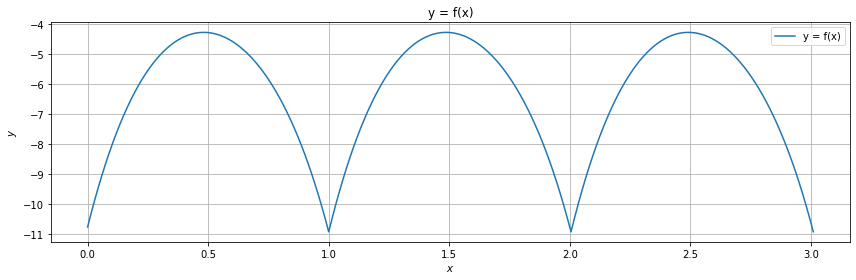

In [35]:
x_plot = [0] * size * 3
fill_x(x_plot, h)

y_plot = y + y + y

# y = f(x)
plt.figure(figsize=[12, 4])
plt.plot(x_plot, y_plot, label='y = f(x)')

plt.title("y = f(x)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

Заметим, что для для полученного решения выполнены условия периодичности:

In [36]:
print("y(0) = ", y[0])
print("y(1) = ", y[-1])

y(0) =  -10.77525596812771
y(1) =  -10.937102216726004


In [37]:
print("y'(0) = ", (y_plot[1] - y_plot[0]) / h)
print("y'(1) = ", (y_plot[0] - y_plot[-1]) / h)

y'(0) =  31.830486921252188
y'(1) =  32.36924971965891
